In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("data.csv")
display(df.head())
display(df.isna().sum())
df.shape

,t,x_1,x_2,x_3,y
0,0.000000,10.032752,9.990681,-3.605162,156.838749
1,0.029575,9.709068,9.407011,-3.598498,148.988418
2,0.059150,9.403461,8.871548,-3.591835,141.726323
3,0.088725,9.114458,8.379128,-3.585171,134.992729
4,0.118299,8.840740,7.925256,-3.578507,128.735435


t      0
x_1    0
x_2    0
x_3    0
y      0
dtype: int64

(1083, 5)

In [13]:
y = df["y"].values

In [14]:
t = df.iloc[:, 1].values

In [15]:
x1 = df["x_1"].values
x2 = df["x_2"].values
x3 = df["x_3"].values

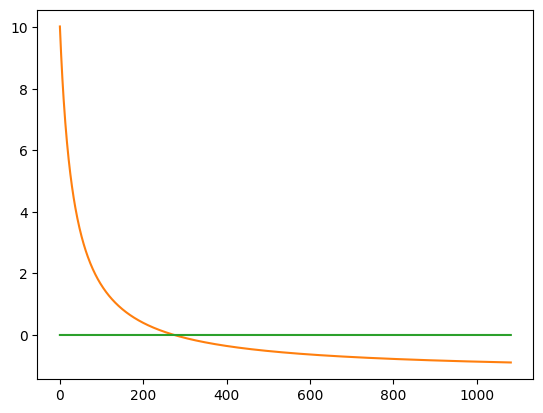

In [16]:
plt.plot(1/np.exp(2)-1)
plt.plot(x1)
plt.plot(np.zeros(np.size(t)))

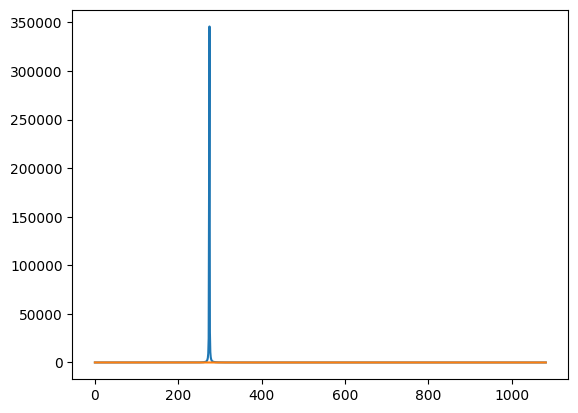

In [17]:
plt.plot(1/(t)**2)
plt.plot(x2)

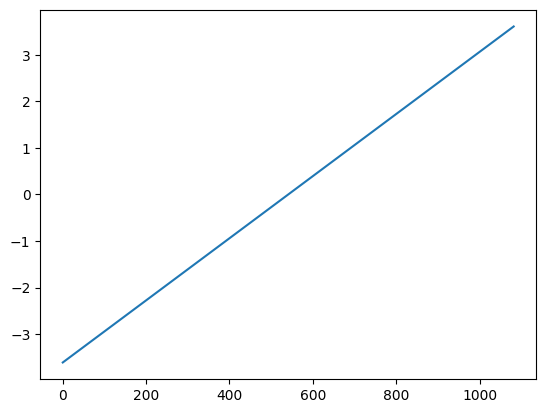

In [18]:
plt.plot(x3)

In [19]:
df = pd.read_csv("data.csv")

In [20]:
t = df["t"].values
y = df["y"].values
N = len(t)

def phi1(t, a, b, c, d):
    return a * np.exp(b*t + d) + c

def phi2(t, a, b, c, d):
    z = b*t + d
    return a / (z**2) + c

def phi3(t, a, b, c, d):
    return a*t + b + c + d

phi_funcs = [phi1, phi2, phi3]

# Начальные параметры
params = {
    "phi1": np.array([1.0, -1.0, 1.0, 0.1]),
    "phi2": np.array([1.0,  1.0, 0.5, 0.1]),
    "phi3": np.array([1.0,  1.0, 0.1, 0.1]),
}

theta = np.zeros(3)

In [21]:
lr = 1e-4
epochs = 8000

def gradients_phi(func, t, a,b,c,d):
    if func == phi1:
        phi = a*np.exp(b*t+d)+c
        dphi_da = np.exp(b*t+d)
        dphi_db = a*t*np.exp(b*t+d)
        dphi_dc = np.ones_like(t)
        dphi_dd = a*np.exp(b*t+d)
        return phi, np.vstack([dphi_da, dphi_db, dphi_dc, dphi_dd])

    if func == phi2:
        z = b*t + d
        phi = a/(z**2) + c
        dphi_da = 1/(z**2)
        dphi_db = a * (-2*t)/(z**3)
        dphi_dc = np.ones_like(t)
        dphi_dd = a * (-2)/(z**3)
        return phi, np.vstack([dphi_da, dphi_db, dphi_dc, dphi_dd])

    if func == phi3:
        phi = a*t + b + c + d
        dphi_da = t
        dphi_db = np.ones_like(t)
        dphi_dc = np.ones_like(t)
        dphi_dd = np.ones_like(t)
        return phi, np.vstack([dphi_da, dphi_db, dphi_dc, dphi_dd])


# Градиентный спуск
loss_history = []

for epoch in range(epochs):

    Phi = np.zeros((N, 3))
    grads = {}

    for i, (name, p) in enumerate(params.items()):
        func = phi_funcs[i]
        phi, dphi = gradients_phi(func, t, *p)
        Phi[:, i] = phi
        grads[name] = dphi

    theta = np.linalg.pinv(Phi) @ y

    # ошибка
    y_hat = Phi @ theta
    e = y_hat - y
    loss = np.mean(e**2)
    loss_history.append(loss)

    # обновление параметров
    for i, (name, p) in enumerate(params.items()):
        dphi = grads[name]
        grad = (theta[i] * (dphi @ e)) / N
        params[name] -= lr * grad

    if epoch % 1000 == 0:
        print(f"{epoch}: loss = {loss}")


0: loss = 148.76349544340988
1000: loss = 0.038702094508000384
2000: loss = 0.0351859891234523
3000: loss = 0.03393440175578331
4000: loss = 0.03311398606341006
5000: loss = 0.03241576551110442
6000: loss = 0.03177643565810088
7000: loss = 0.03118092878931835


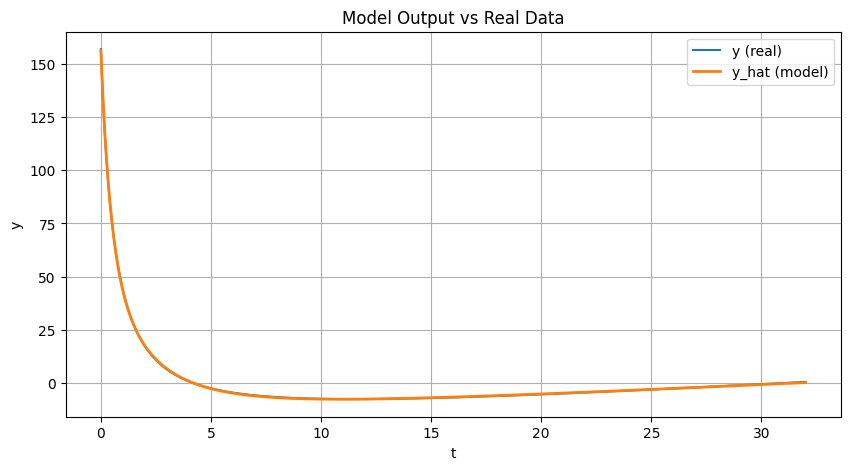

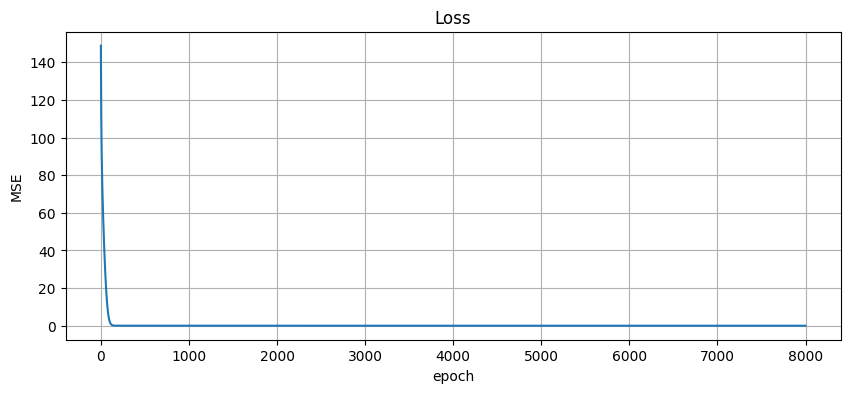

In [22]:
plt.figure(figsize=(10,5))
plt.plot(t, y, label="y (real)")
plt.plot(t, y_hat, label="y_hat (model)", linewidth=2)
plt.grid(True)
plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.title("Model Output vs Real Data")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(loss_history)
plt.grid(True)
plt.title("Loss")
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.show()

In [23]:
# Итоги
print("\n--- Итоговые параметры φ_i ---")
for name, p in params.items():
    print(name, p)

print("\nθ =", theta)


--- Итоговые параметры φ_i ---
phi1 [ 0.94861287 -1.04126612  1.04889464  0.04992134]
phi2 [1.052627   0.51475525 0.37697533 0.73238069]
phi3 [0.99916333 1.00069638 0.10069638 0.10069638]

θ = [-58.04634413 117.26884973   0.49710772]
